## Import the libraries

In [1]:
# Basic libraries
import pymysql
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from imblearn.combine import SMOTETomek


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score



# Other
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings("ignore")

## 1. The Goal

The goal of this project is to predict whether an employee is going to leave a company or not. 
Various factors will be taken into consideration, such as performance scores, satisfaction scores etc.

## 2. Getting the data

In [2]:
# read the data into Python

data = pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,Y,No,17,3,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,Y,No,15,3,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Y,Yes,20,4,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,Y,No,14,3,4,80,0,17,3,2,9,6,0,8


In [3]:
# check how many columns and rows we have

data.shape

(1470, 35)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [5]:
# look deeper intot the dataset

data.describe().round(1)

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0,1470.0
mean,36.9,802.5,9.2,2.9,1.0,1024.9,2.7,65.9,2.7,2.1,2.7,6502.9,14313.1,2.7,15.2,3.2,2.7,80.0,0.8,11.3,2.8,2.8,7.0,4.2,2.2,4.1
std,9.1,403.5,8.1,1.0,0.0,602.0,1.1,20.3,0.7,1.1,1.1,4708.0,7117.8,2.5,3.7,0.4,1.1,0.0,0.9,7.8,1.3,0.7,6.1,3.6,3.2,3.6
min,18.0,102.0,1.0,1.0,1.0,1.0,1.0,30.0,1.0,1.0,1.0,1009.0,2094.0,0.0,11.0,3.0,1.0,80.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
25%,30.0,465.0,2.0,2.0,1.0,491.2,2.0,48.0,2.0,1.0,2.0,2911.0,8047.0,1.0,12.0,3.0,2.0,80.0,0.0,6.0,2.0,2.0,3.0,2.0,0.0,2.0
50%,36.0,802.0,7.0,3.0,1.0,1020.5,3.0,66.0,3.0,2.0,3.0,4919.0,14235.5,2.0,14.0,3.0,3.0,80.0,1.0,10.0,3.0,3.0,5.0,3.0,1.0,3.0
75%,43.0,1157.0,14.0,4.0,1.0,1555.8,4.0,83.8,3.0,3.0,4.0,8379.0,20461.5,4.0,18.0,3.0,4.0,80.0,1.0,15.0,3.0,3.0,9.0,7.0,3.0,7.0
max,60.0,1499.0,29.0,5.0,1.0,2068.0,4.0,100.0,4.0,5.0,4.0,19999.0,26999.0,9.0,25.0,4.0,4.0,80.0,3.0,40.0,6.0,4.0,40.0,18.0,15.0,17.0


## 3. Clean the data

In [20]:
#change the names of the columns

data = data.rename(columns={
                       'Age': 'age',
                       'Attrition': 'attrition',
                       'BusinessTravel': 'business_travel',
                       'DailyRate': 'daily_travel',
                       'Department': 'department',
                       'DistanceFromHome': 'distance_from_home',
                       'Education': 'education',
                       'EducationField': 'education_field',
                       'EmployeeCount': 'employee_count',
                       'EmployeeNumber': 'employee_number',
                       'EnvironmentSatisfaction': 'environment_satisfaction',
                       'Gender': 'gender',     
                       'HourlyRate': 'hourly_rate',
                       'JobInvolvement': 'job_involvement',
                       'JobLevel': 'job_level',
                       'JobRole': 'job_role',
                       'JobSatisfaction': 'job_satisfaction',
                       'MaritalStatus': 'marital_status',
                       'MonthlyIncome': 'monthly_income',
                       'MonthlyRate': 'monthly_rate',
                       'NumCompaniesWorked': 'num_companies_worked',
                       'Over18': 'over_18',
                       'OverTime': 'over_time',
                       'PercentSalaryHike': 'percent_salary_hike',
                       'PerformanceRating': 'performance_rating',
                       'RelationshipSatisfaction': 'relationship_satisfaction',
                       'StandardHours': 'standard_hours',
                       'StockOptionLevel': 'stock_option_level',
                       'TotalWorkingYears': 'total_working_years',
                       'TrainingTimesLastYear': 'training_times_last_year',
                       'WorkLifeBalance': 'work_life_balance',
                       'YearsAtCompany': 'years_at_company',
                       'YearsInCurrentRole': 'years_in_current_role',
                       'YearsSinceLastPromotion': 'years_since_last_promotion',
                       'YearsWithCurrManager': 'years_with_curr_manager'
})
data.head(5)

,age,attrition,business_travel,daily_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2


In [7]:
# checking for null values

data.isna().sum()

age                           0
attrition                     0
business_travel               0
daily_travel                  0
department                    0
distance_from_home            0
education                     0
education_field               0
employee_count                0
employee_number               0
environment_satisfaction      0
gender                        0
hourly_rate                   0
job_involvement               0
job_level                     0
job_role                      0
job_satisfaction              0
marital_status                0
monthly_income                0
monthly_rate                  0
num_companies_worked          0
over_18                       0
over_time                     0
percent_salary_hike           0
performance_rating            0
relationship_satisfaction     0
standard_hours                0
stock_option_level            0
total_working_years           0
training_times_last_year      0
work_life_balance             0
years_at

As we can see from the above, there are no null values

In [8]:
# we can drop employee_number, over_18, employee_count and standard_hours as they have no use in the model

data = data.drop(['employee_number', 'over_18', 'employee_count', 'standard_hours'], axis = 1)
data

,age,attrition,business_travel,daily_travel,department,distance_from_home,education,education_field,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_income,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Yes,11,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,No,23,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Yes,15,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Yes,11,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,No,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,4,2,Laboratory Technician,4,Married,2571,12290,4,No,17,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,2,3,Healthcare Representative,1,Married,9991,21457,4,No,15,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,4,2,Manufacturing Director,2,Married,6142,5174,1,Yes,20,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,2,2,Sales Executive,2,Married,5390,13243,2,No,14,3,4,0,17,3,2,9,6,0,8


In [9]:
# just a quick look into performance vs attrition

attrition = data[['attrition', 'performance_rating']]
attrition

,attrition,performance_rating
0,Yes,3
1,No,4
2,Yes,3
3,No,3
4,No,3
...,...,...
1465,No,3
1466,No,3
1467,No,4
1468,No,3


In [10]:
#split numericals and categoricals

data_cat = data.select_dtypes(include = np.object)
data_num = data.select_dtypes(include = np.number)

In [11]:
data_cat

,attrition,business_travel,department,education_field,gender,job_role,marital_status,over_time
0,Yes,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single,Yes
1,No,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married,No
2,Yes,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single,Yes
3,No,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married,Yes
4,No,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married,No
...,...,...,...,...,...,...,...,...
1465,No,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married,No
1466,No,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married,No
1467,No,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married,Yes
1468,No,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married,No


In [12]:
data_num

,age,daily_travel,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,41,1102,1,2,2,94,3,2,4,5993,19479,8,11,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,24907,1,23,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,2396,6,15,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,23159,1,11,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,16632,9,12,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,12290,4,17,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,21457,4,15,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,5174,1,20,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,13243,2,14,3,4,0,17,3,2,9,6,0,8


In [13]:
# scale numerical features

transformer = MinMaxScaler().fit(data_num)
data_num_minmax = transformer.transform(data_num) 
data_num_norm = pd.DataFrame(data_num_minmax,columns= data_num.columns)
data_num_norm.head()

,age,daily_travel,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647


In [14]:
# encode the categorical feature

data_cat_dumm = pd.get_dummies(data_cat, drop_first = True)
data_cat_dumm.head()

,attrition_Yes,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [16]:
# we want to rename the columns attrition_Yes to attrition as we only have 1 attrition columns and want to keep it simple

data_cat_dumm = data_cat_dumm.rename(columns = {'attrition_Yes': 'attrition'})
data_cat_dumm

,attrition,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0
1466,0,0,1,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0
1467,0,0,1,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1
1468,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0


## EDA

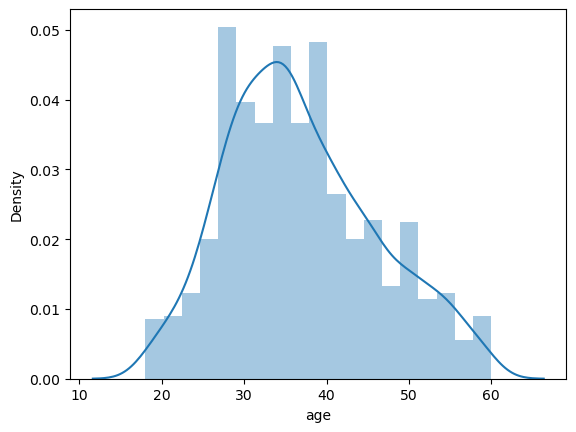

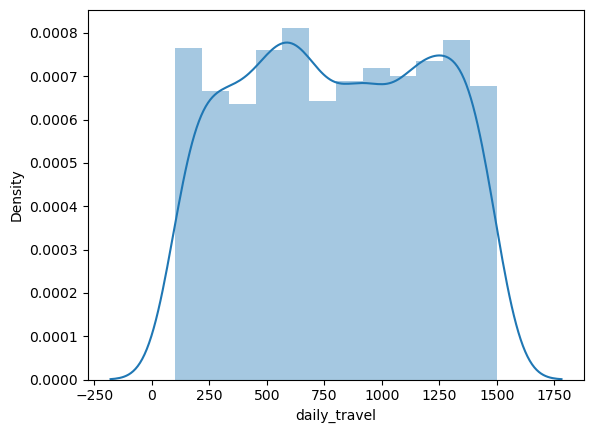

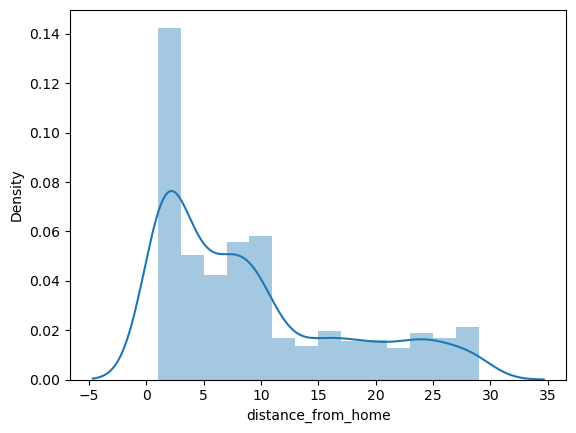

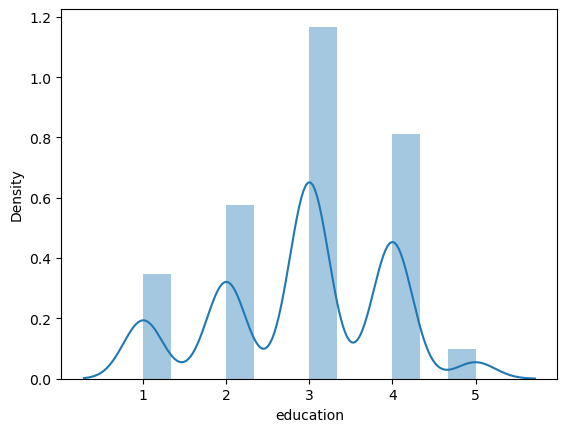

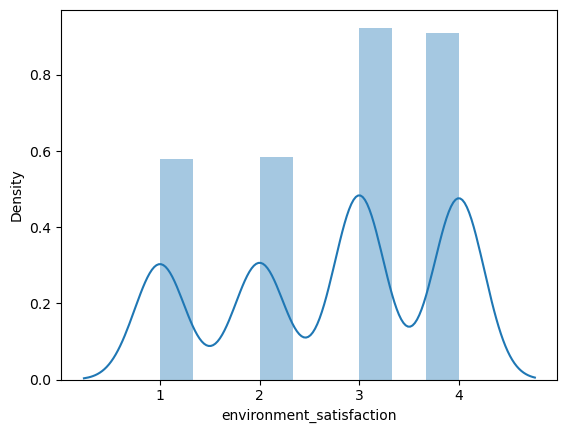

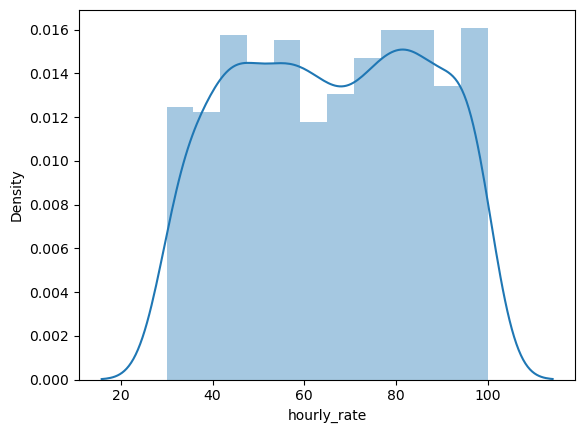

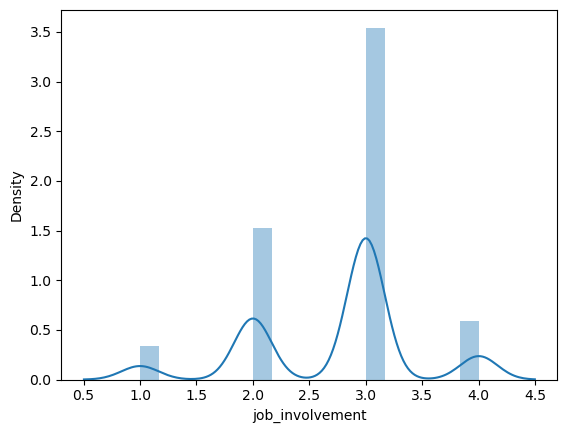

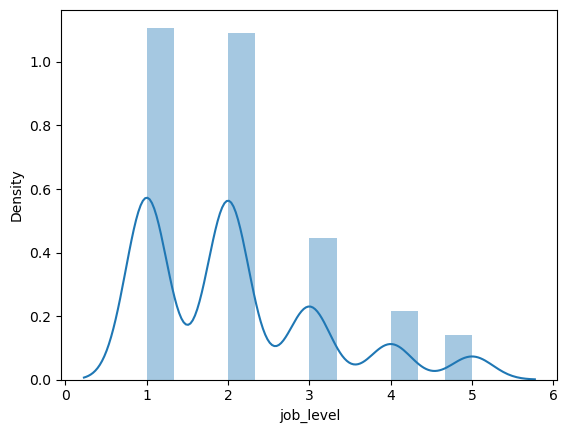

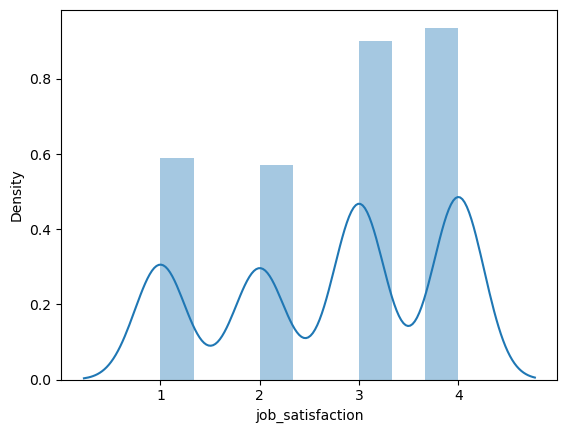

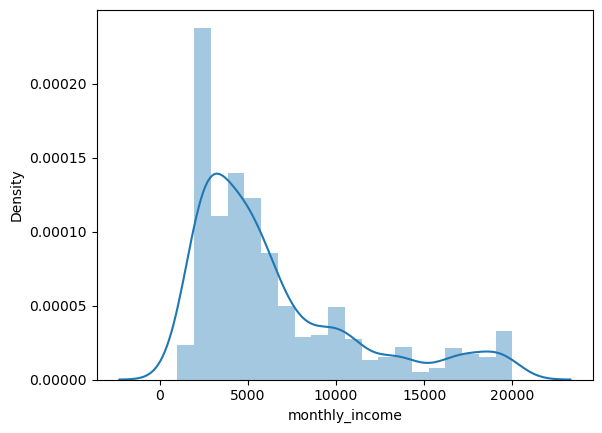

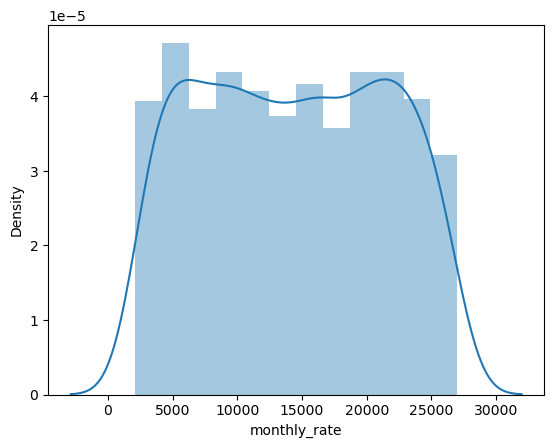

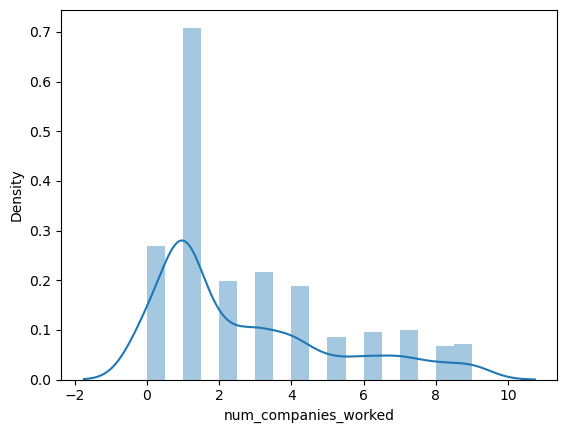

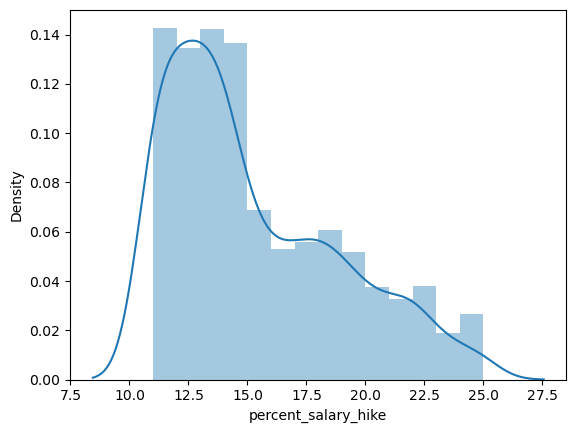

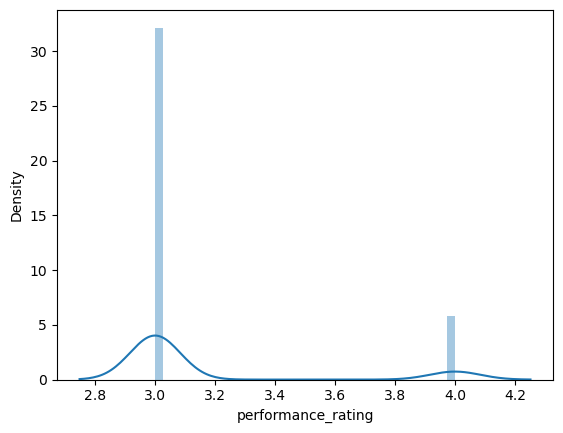

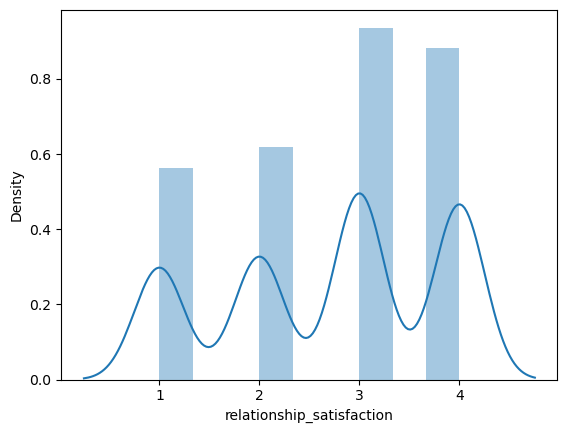

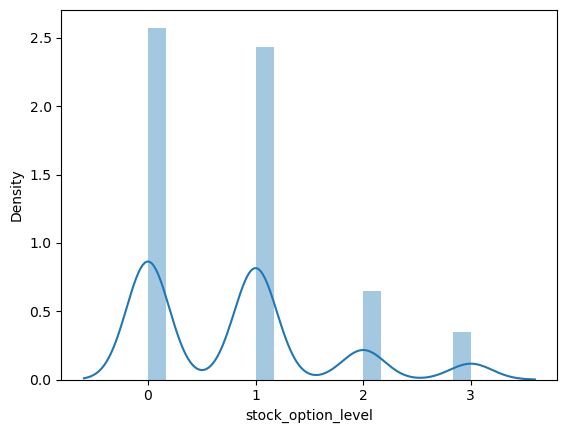

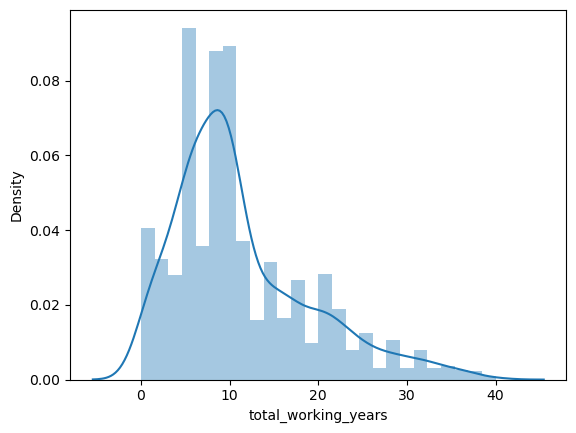

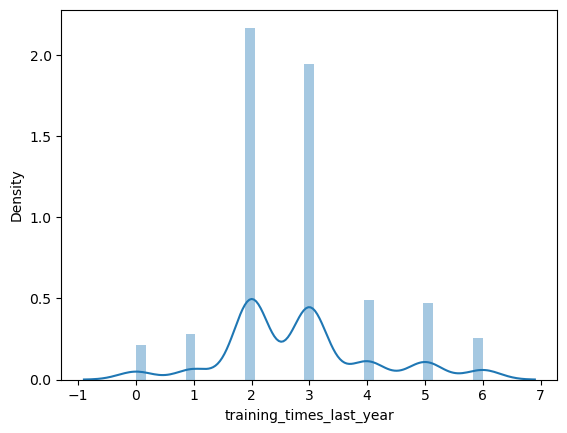

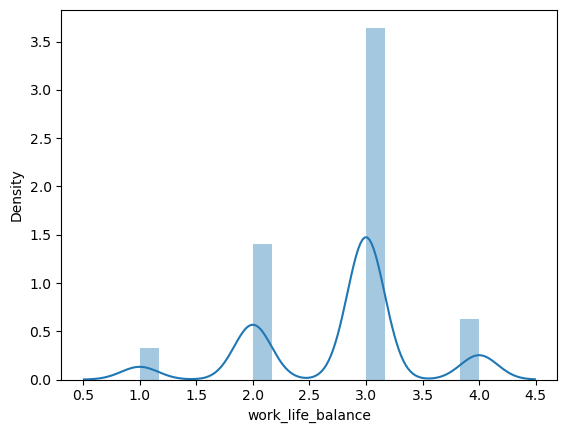

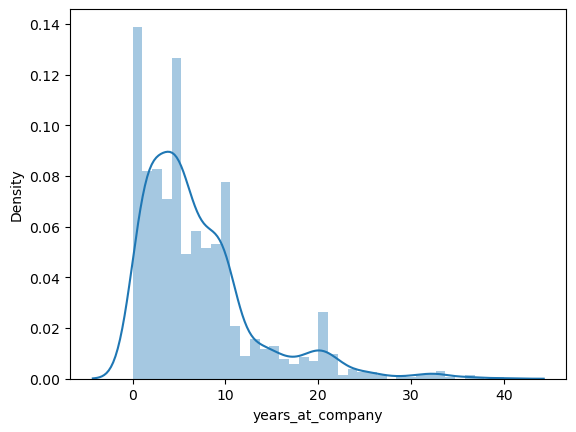

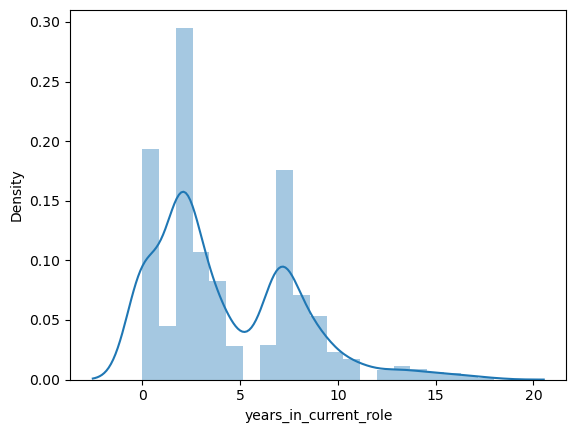

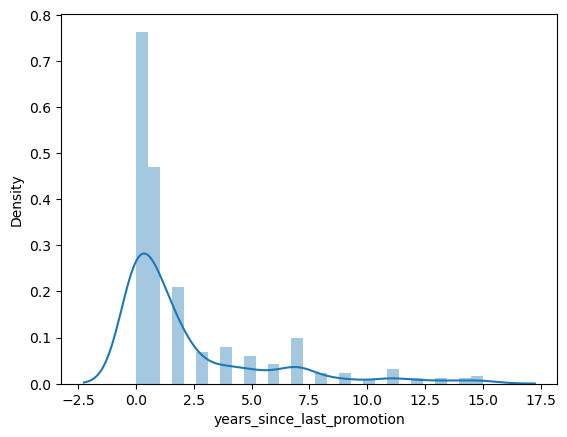

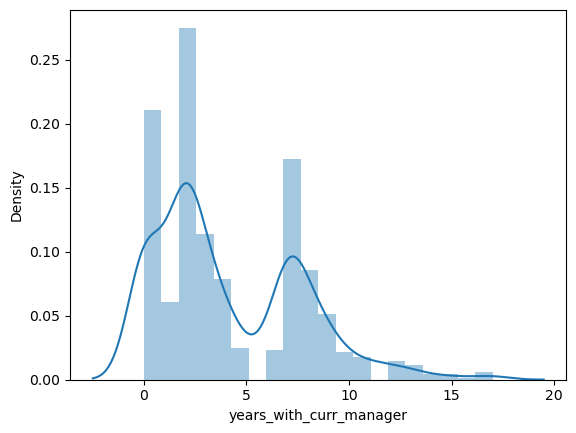

In [18]:
# visualise the numericals using distplot

for column in data_num.columns:
    sns.distplot(data_num[column])
    plt.show()

Unfortunately I ran out of time, but I would have come back to this and split the numerical discrete and numerical continuous data

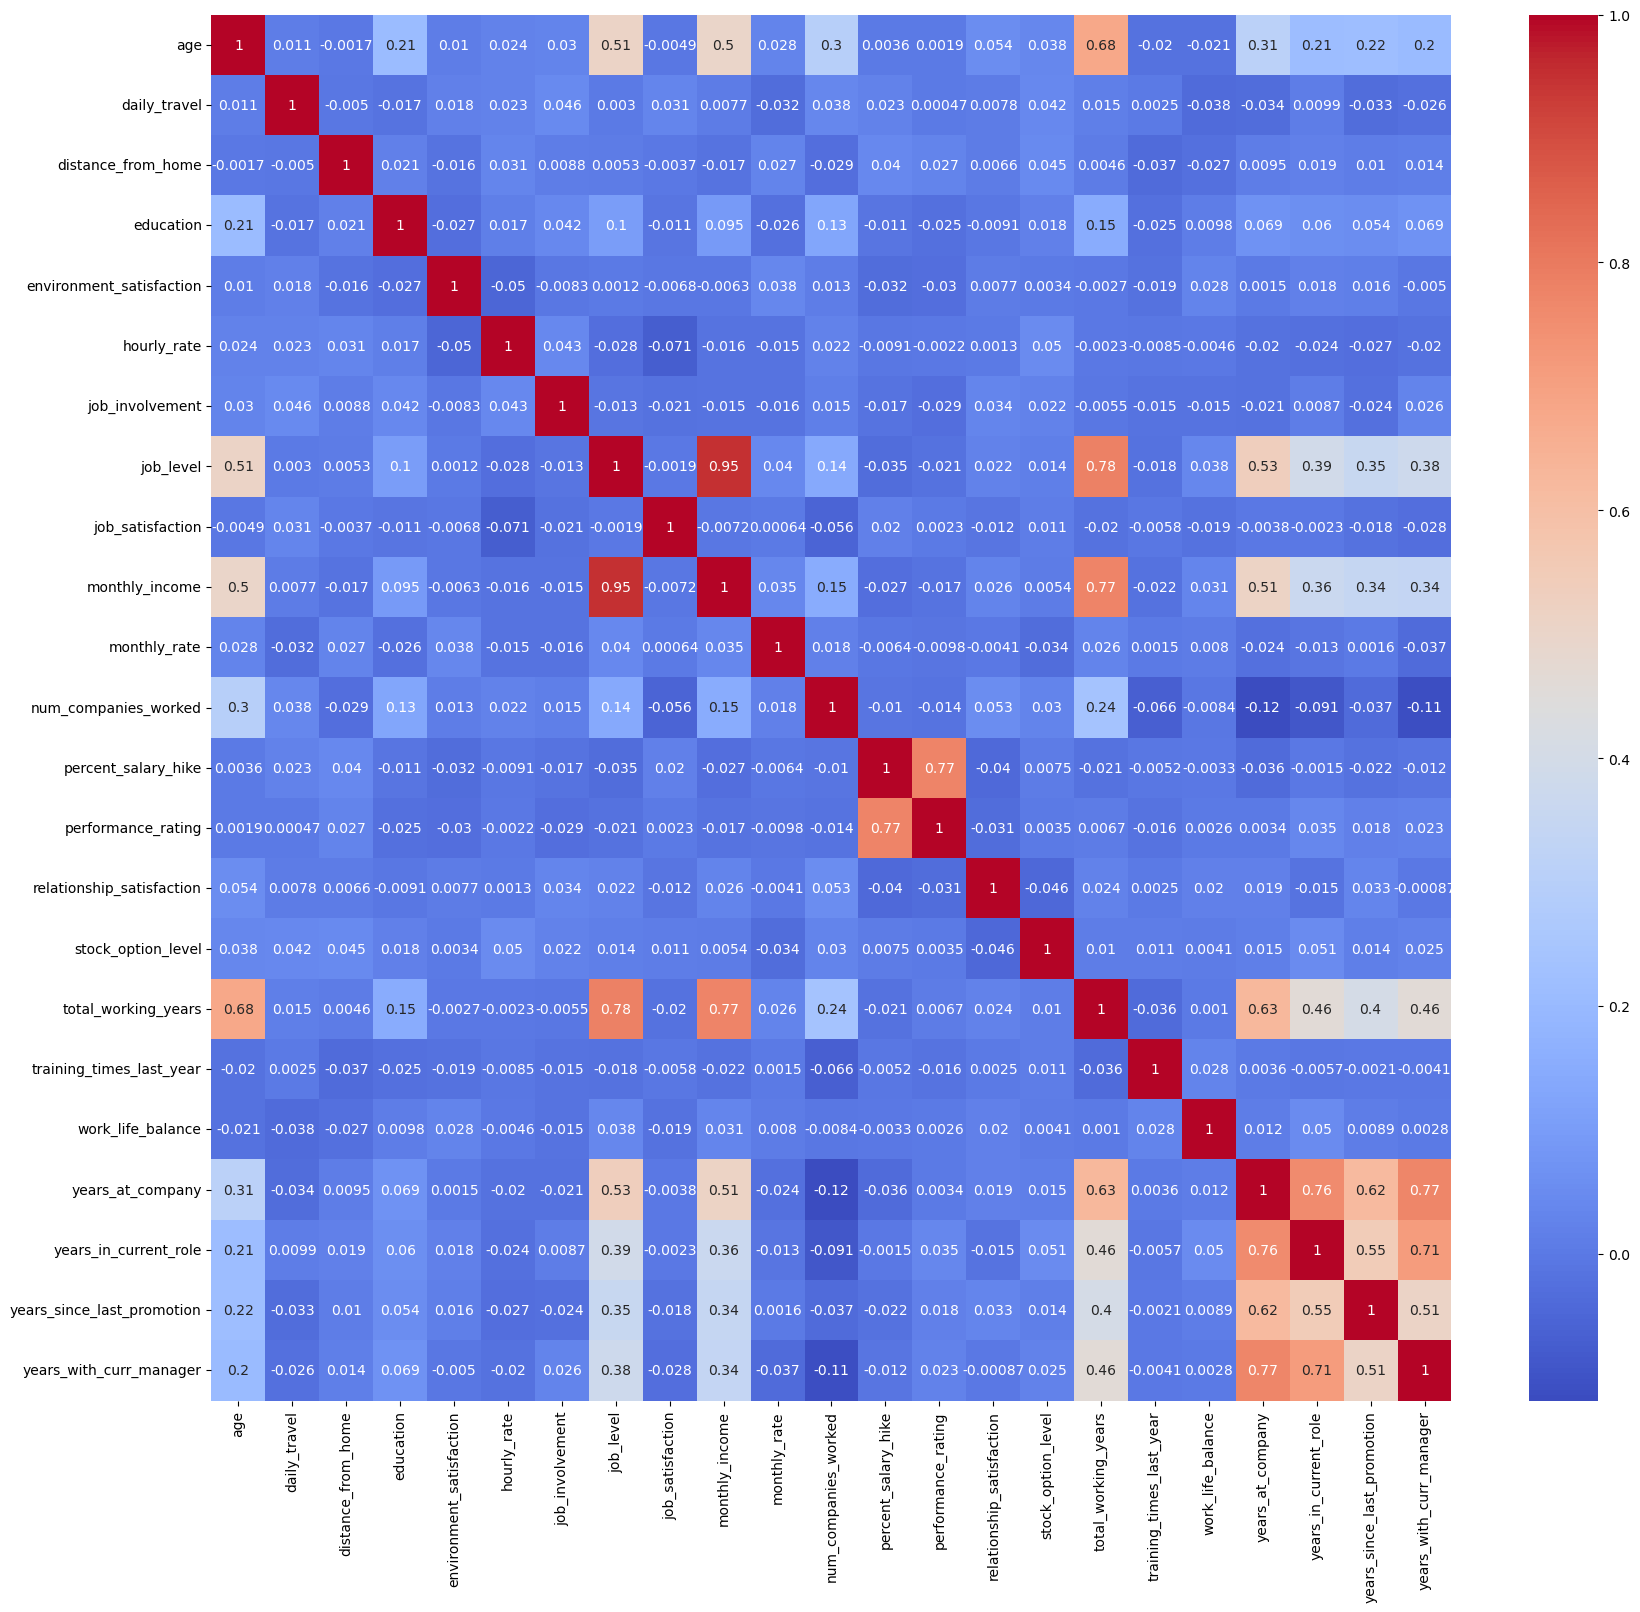

In [19]:
#use a correlation matrix to see the relationships between variables

corr_matrix = data_num.corr()
plt.figure(figsize = (20, 18)) # as there are a large number of features, I have increased the size of the correlation matrix
sns_plot = sns.heatmap(corr_matrix, annot = True, cmap = 'coolwarm')
plt.show()


We see some highly correlated variables, such as total_working_years and job_level, but they are not correlated enought to remove columns

I decided to try out a Kernel Density Estimation (KDE) 

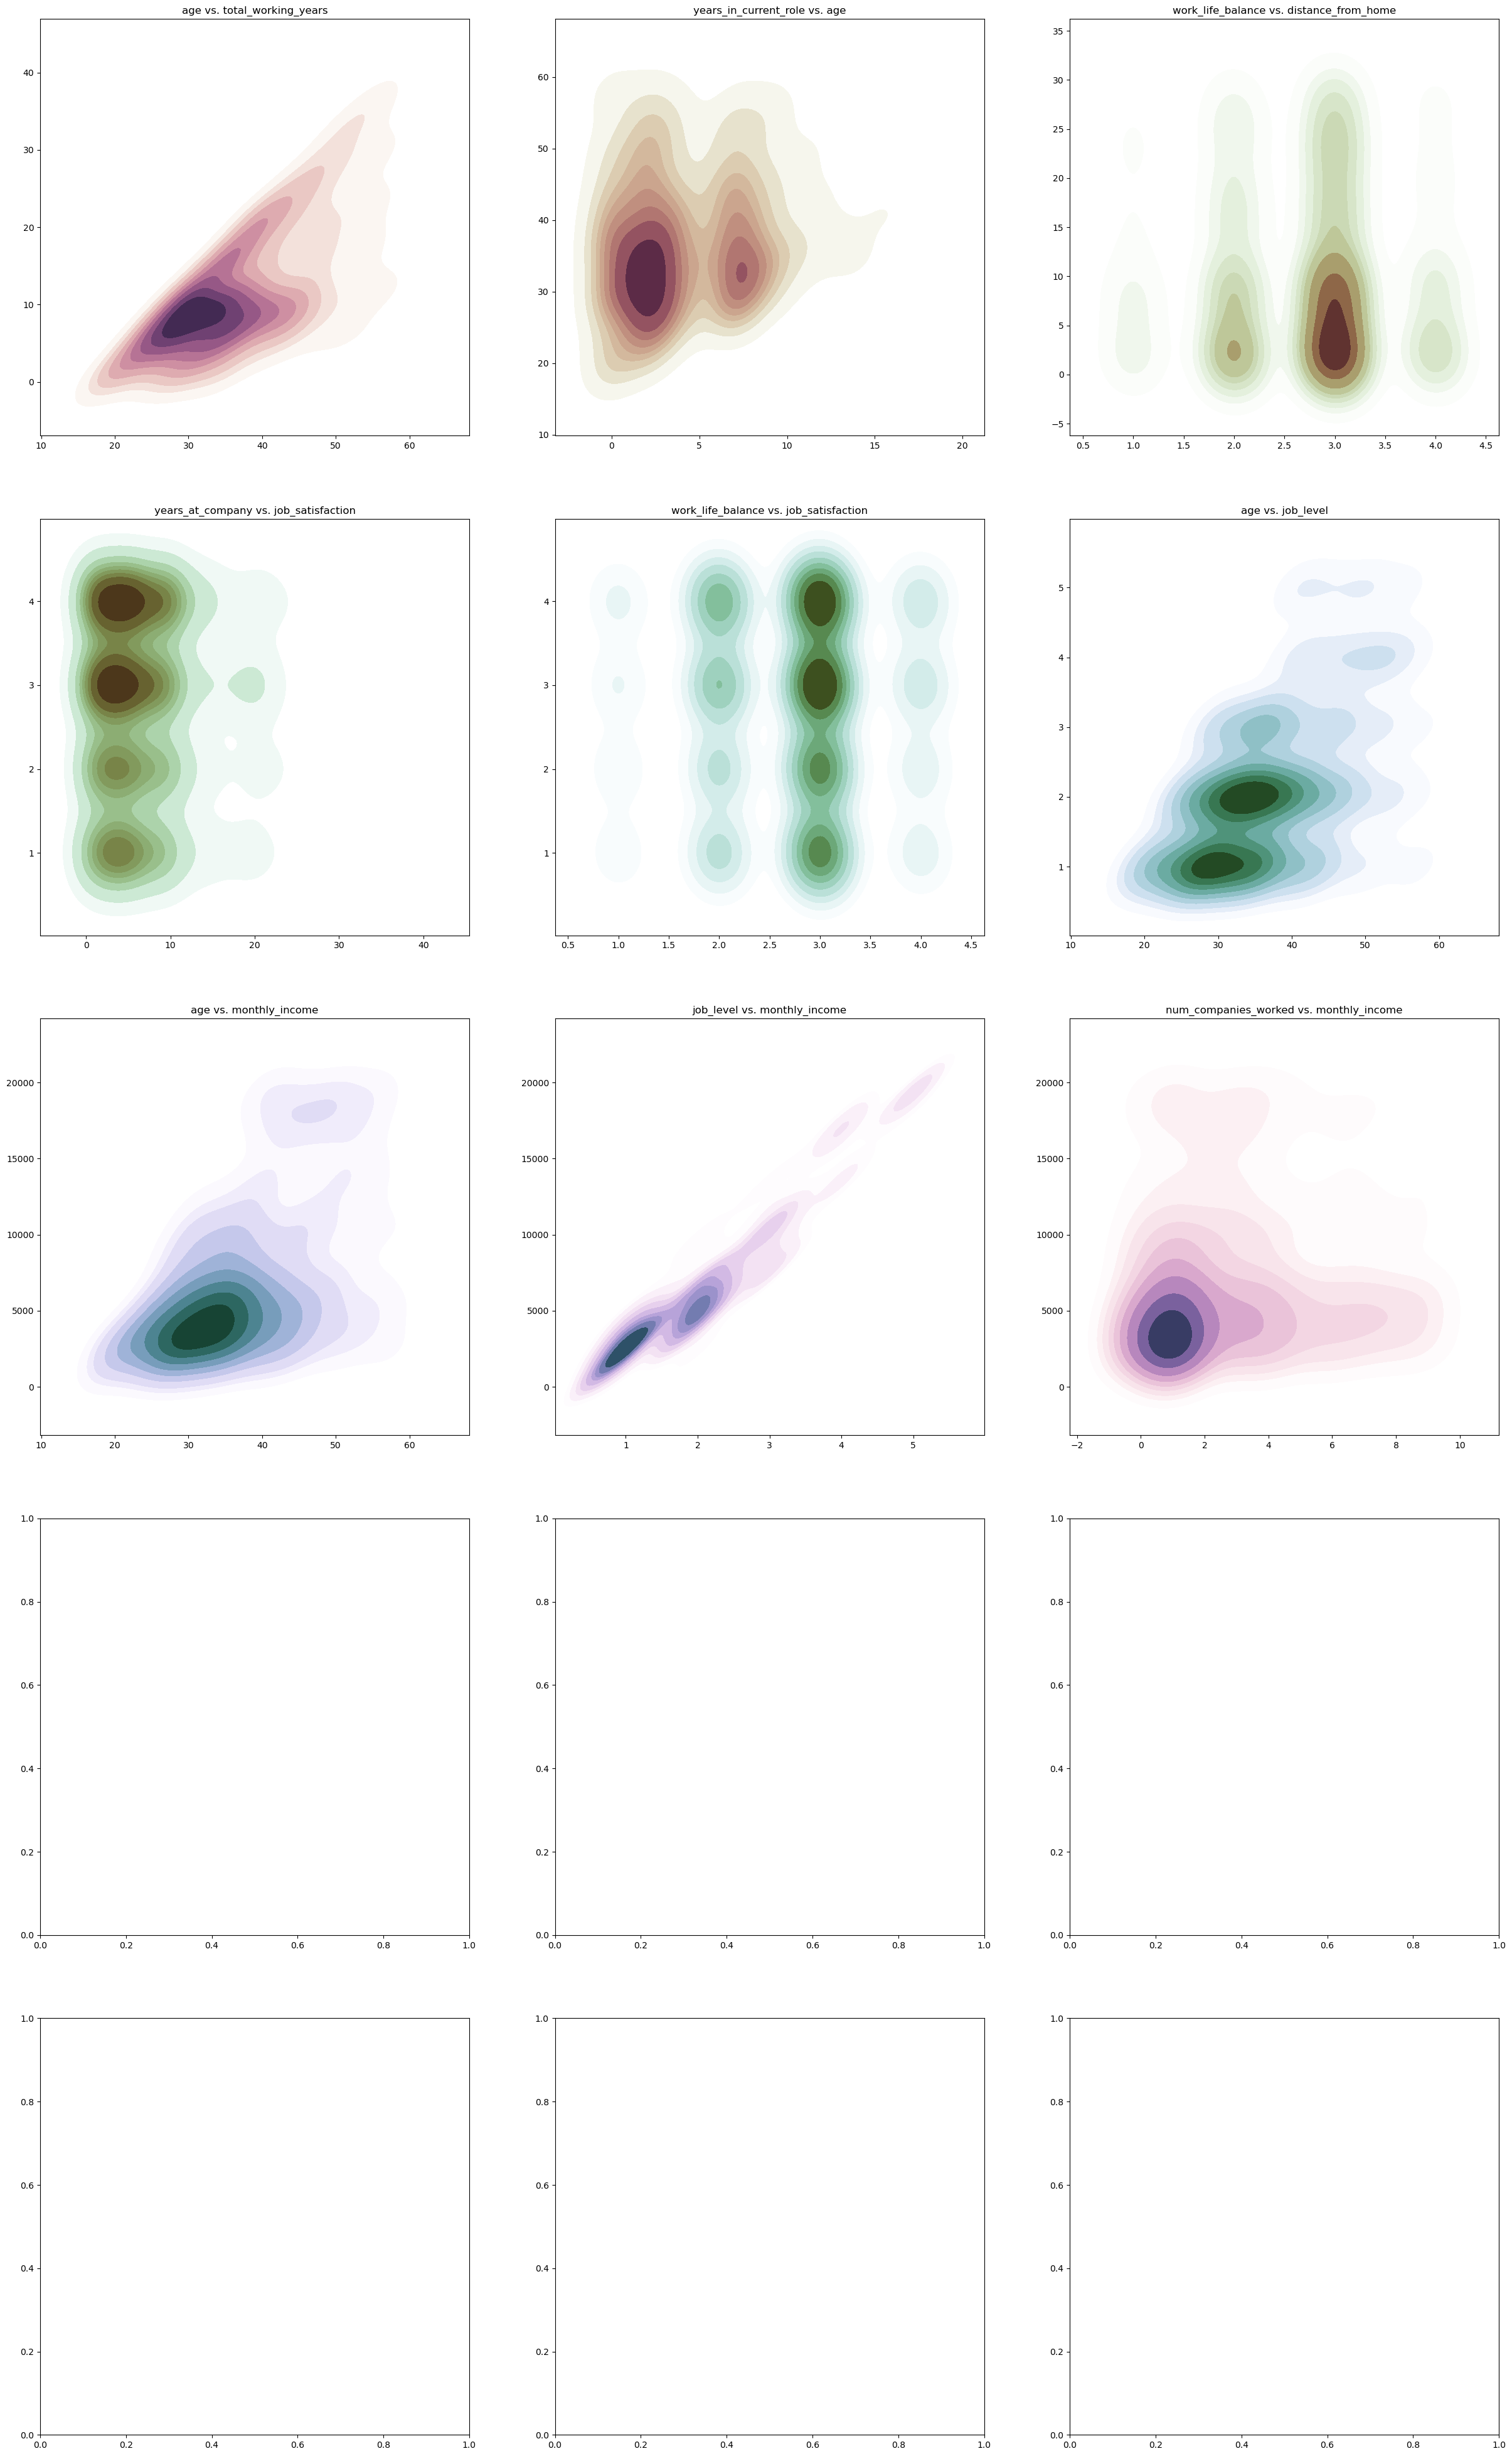

In [23]:
# Creating subplots
f, axes = plt.subplots(5, 3, figsize = (30,50), sharex = False, sharey = False)

# Set color palette
color_start = 0.0
cmap = sns.cubehelix_palette(start = 0.0, light = 1, as_cmap = True)
axes_x = 0
axes_y = 0

def plot_xy(x_label, y_label):
    global color_start, cmap, axes, axes_x, axes_y
    x = data_num[x_label].values
    y = data_num[y_label].values
    sns.kdeplot(x, y, cmap = cmap, shade = True, ax = axes[axes_x, axes_y])
    axes[axes_x, axes_y].set(title = '{} vs. {}'.format(x_label, y_label))
    axes_y = axes_y + 1
    if axes_y == 3:
        axes_y = 0
        axes_x = axes_x + 1
    color_start = color_start + 0.33
    cmap = sns.cubehelix_palette(start = color_start, light = 1, as_cmap = True)


plot_xy('age', 'total_working_years')
plot_xy('years_in_current_role', 'age')
plot_xy('work_life_balance', 'distance_from_home')
plot_xy('years_at_company', 'job_satisfaction')
plot_xy('work_life_balance', 'job_satisfaction')
plot_xy('age', 'job_level')
plot_xy('age', 'monthly_income')
plot_xy('job_level', 'monthly_income')
plot_xy('num_companies_worked', 'monthly_income')

As we can see in the above visualizations the areas that are darker mean that there are more people in the dataset that have this combination e.g. alot of people who are around 30 years old, have about 10 years of working experience. We also see a positive relationship with these variables, which is also quite logical - the older you are the more years' experience you have

In [24]:
# concat the dataframes

concatenated_data = pd.concat([data_num_norm, data_cat_dumm], axis = 1)
concatenated_data.head()

,age,daily_travel,distance_from_home,education,environment_satisfaction,hourly_rate,job_involvement,job_level,job_satisfaction,monthly_income,monthly_rate,num_companies_worked,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_since_last_promotion,years_with_curr_manager,attrition,business_travel_Travel_Frequently,business_travel_Travel_Rarely,department_Research & Development,department_Sales,education_field_Life Sciences,education_field_Marketing,education_field_Medical,education_field_Other,education_field_Technical Degree,gender_Male,job_role_Human Resources,job_role_Laboratory Technician,job_role_Manager,job_role_Manufacturing Director,job_role_Research Director,job_role_Research Scientist,job_role_Sales Executive,job_role_Sales Representative,marital_status_Married,marital_status_Single,over_time_Yes
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,0.698053,0.888889,0.000000,0.0,0.000000,0.000000,0.200,0.0,0.000000,0.15,0.222222,0.000000,0.294118,1,0,1,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,0.916001,0.111111,0.857143,1.0,1.000000,0.333333,0.250,0.5,0.666667,0.25,0.388889,0.066667,0.411765,0,1,0,1,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,0.012126,0.666667,0.285714,0.0,0.333333,0.000000,0.175,0.5,0.666667,0.00,0.000000,0.000000,0.000000,1,0,1,1,0,0,0,0,1,0,1,0,1,0,0,0,0,0,0,0,1,1
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,0.845814,0.111111,0.000000,0.0,0.666667,0.000000,0.200,0.5,0.666667,0.20,0.388889,0.200000,0.000000,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,0.583738,1.000000,0.071429,0.0,1.000000,0.333333,0.150,0.5,0.666667,0.05,0.111111,0.133333,0.117647,0,0,1,1,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0


In [25]:
# define X and y for the model, our target is attrition

X = concatenated_data.drop('attrition', axis = 1)  
y = concatenated_data['attrition']  

## Modeling

In [26]:
# Split the data into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

In [27]:
len(X_train)

1029

In [28]:
y_train

714     0
135     0
1271    1
477     0
806     0
       ..
1130    0
1294    0
860     1
1459    0
1126    0
Name: attrition, Length: 1029, dtype: uint8

In [45]:
# the first model I am trying is logisitc regression
classification = LogisticRegression(random_state = 0).fit(X_train, y_train)

In [30]:
# predictions with testing dataset

predictions = classification.predict(X_test)

## Evaluate the Model

In [31]:
pd.Series(predictions).value_counts()

0    411
1     30
dtype: int64

In [32]:
y_test.value_counts()

0    380
1     61
Name: attrition, dtype: int64

In [33]:
cm = confusion_matrix(predictions, y_test)
cm

array([[371,  40],
       [  9,  21]])

<AxesSubplot:>

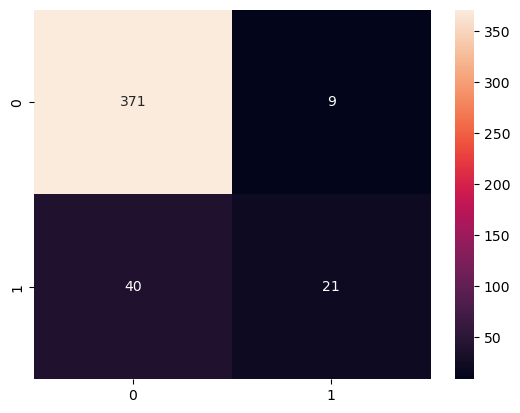

In [34]:
# apply the confusion matrix

cm = confusion_matrix(y_test, predictions)
sns.heatmap(cm, annot = True,fmt = 'g')

There are a lot of true positives, 

In [35]:
# accuracy

classification.score(X_test, y_test)

0.8888888888888888

In [36]:
# accuracy

print('\nAccuracy: {:.2f}\n'.format(accuracy_score(y_test, predictions)))


Accuracy: 0.89



In [37]:
# this is how we calculate precision 

precision = 371 / (371 + 40)
precision

0.902676399026764

In [38]:
# this is how we calculate recall

recall = 371 / (371 + 9)
recall

0.9763157894736842

In [39]:
# this is how we calculate the F1 score

F1_score = 2 * (precision * recall) / (precision + recall)
F1_score

0.9380530973451326

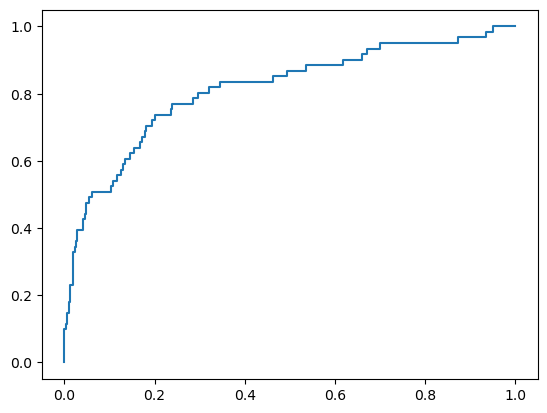

In [40]:
# Roc Curve - done by binarizing the target

from sklearn import metrics
import matplotlib.pyplot as plt

y_pred_proba = classification.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr)

In [41]:
actual = [0, 1, 1, 1] # these are the actual values
predicted = [0, 0, 1, 1]
df = pd.DataFrame(data = {"acutal":actual, "predicted":predicted})
df

,acutal,predicted
0,0,0
1,1,0
2,1,1
3,1,1


In [42]:
cm = metrics.confusion_matrix(actual, predicted)

<AxesSubplot:>

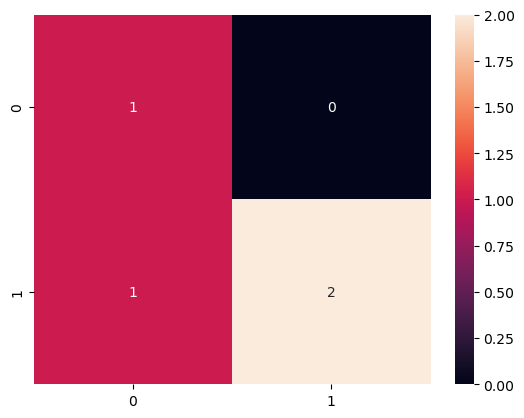

In [43]:
sns.heatmap(cm, annot = True)

In [44]:
# classification report, this shows us the recision, recall, f1-score, support and accuracy. 
# but in this report you can also see how well the model predicts the 2 different classes: 0 (attrition = yes) and (attrition = no)

report = classification_report(y_test, predictions)

print("Classification Report:\n", report)

Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.70      0.34      0.46        61

    accuracy                           0.89       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441



From this report, we can observe that:

- The model performs well in predicting class 0 (attrition = Yes) with high precision, recall, and F1-score.<br>
- However, for class 1 (attrition = No), the model has a lower precision, recall, and F1-score, indicating that it struggles to correctly predict this class.<br>
- The overall accuracy of the model is 0.89, suggesting that it correctly predicts 89% of the instances in the dataset.<br>
- The macro average F1-score is 0.70, indicating a reasonable balance between precision and recall across both classes.<br>
- The weighted average F1-score is 0.87, taking into account the class imbalance and providing a weighted evaluation metric that emphasizes the larger class (class 0).<br>

The model is not able to predict class 1 very well, so let's check for imbalanced data

## Imbalanced data

In [46]:
#visualise the balance of attrition 'yes' vs 'no'

attrition_counts = data['attrition'].value_counts()

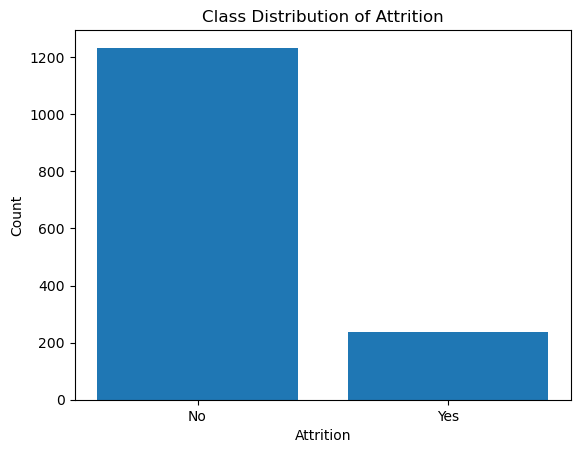

In [47]:
plt.bar(attrition_counts.index, attrition_counts.values)
plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Class Distribution of Attrition')
plt.show()

We have a class imbalance - there is a much higher proportion of attrition = no

## SMOTE

Let's apply SMOTE to oversample the minority class

In [52]:
smote = SMOTE()
X_smote, y_smote = smote.fit_resample(X, y)

y_smote.value_counts()

1    1233
0    1233
Name: attrition, dtype: int64

In [53]:
# # round 2 of logistic regression to train model
# classification_smote = LogisticRegression(random_state = 0).fit(X_smote, y_smote)

In [54]:
# predictions with testing dataset

# predictions_smote = classification_smote.predict(X_test)

In [55]:
# classification report

# report_smote = classification_report(y_test, predictions_smote)

# print("Classification Report:\n", report_smote)

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.82      0.88       380
           1       0.39      0.72      0.50        61

    accuracy                           0.80       441
   macro avg       0.67      0.77      0.69       441
weighted avg       0.87      0.80      0.83       441



SMOTE has descreased the accuracy, so now I will apply Tomek links to perfrom undersampling

In [56]:
# Tomek links

smt = SMOTETomek(random_state = 42)
X_tomek, y_tomek = smt.fit_resample(X_smote, y_smote)

In [57]:
# round 3 of logistic regression to train model
classification_tomek = LogisticRegression(random_state = 0).fit(X_tomek, y_tomek)

In [58]:
predictions_tomek = classification_tomek.predict(X_test)

In [59]:
report_tomek = classification_report(y_test, predictions_tomek)

print("Classification Report with Tomek links:\n", report_tomek)

Classification Report with Tomek links:
               precision    recall  f1-score   support

           0       0.95      0.81      0.87       380
           1       0.38      0.72      0.50        61

    accuracy                           0.80       441
   macro avg       0.66      0.77      0.69       441
weighted avg       0.87      0.80      0.82       441



Tomek Links also helped the model in predicting class 1 (only slightly), but has also decreased the accuracy

## I would now like to apply different models

In [60]:
# I am goin to apply Logistic Regression, Decision Tree, Random Forest and Support Vector Machine


def apply_models(X, y, test_size = 0.2, random_state = 42):
   
    # Initialize models
    models = {
        'Logistic Regression': LogisticRegression(random_state = random_state),
        'Decision Tree': DecisionTreeClassifier(random_state = random_state),
        'Random Forest': RandomForestClassifier(random_state = random_state),
        'Support Vector Machine': SVC(random_state = random_state)
    }

    # Train and evaluate each model
    results = {}
    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)

        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test, y_pred)
        recall = recall_score(y_test, y_pred)
        f1 = f1_score(y_test, y_pred)

        # Store the evaluation metrics in the results dictionary
        results[model_name] = {
            'model': model,
            'accuracy': accuracy,
            'precision': precision,
            'recall': recall,
            'f1': f1
        }

        print(f"{model_name} - Accuracy: {accuracy:.4f}, Precision: {precision:.4f}, Recall: {recall:.4f}, F1-Score: {f1:.4f}")

        # Generate classification reports
        report = classification_report(y_test, y_pred)
        print(f"\nClassification Report for {model_name}:\n{report}\n")

    return results

# apply the model
results = apply_models(X, y)


Logistic Regression - Accuracy: 0.8889, Precision: 0.7000, Recall: 0.3443, F1-Score: 0.4615

Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.70      0.34      0.46        61

    accuracy                           0.89       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441


Decision Tree - Accuracy: 0.7982, Precision: 0.3000, Recall: 0.3443, F1-Score: 0.3206

Classification Report for Decision Tree:
              precision    recall  f1-score   support

           0       0.89      0.87      0.88       380
           1       0.30      0.34      0.32        61

    accuracy                           0.80       441
   macro avg       0.60      0.61      0.60       441
weighted avg       0.81      0.80      0.80       441


Random Forest - Accuracy: 0.8662, Precision: 0.6000, Recall: 0.0984, F1-Scor

Looking at the above results, we see that none of the models are very good at predicting class 1 (attrition = no)

Logisitc Regression appears to be the best model, however it needs to be improved to identify employees who are likely to leave (attrition = yes). 
The model still needs to be improved.

## Hyperparameter Tuning

### Logisitc Regression
Logisitc Regression has less parameters so performing hyperparameter tuning is not as successful, but I am going to try it anyway

In [62]:
# Define the hyperparameter grid for Logistic Regression
param_grid = {
    'C': [0.01, 0.1, 1.0, 10.0],
    'solver': ['liblinear', 'lbfgs', 'saga']
}

# Initialize Logistic Regression classifier
log_reg_model = LogisticRegression(random_state = 42)

# Perform Grid Search with cross-validation
grid_search = GridSearchCV(log_reg_model, param_grid, cv = 5, scoring = 'accuracy')
grid_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_log_reg_model = grid_search.best_estimator_


### Evaluate the model after hyperparameter tuning (Logistic Regression)

In [63]:
# look at the original model first
classification = LogisticRegression(random_state=42)
classification.fit(X_train, y_train)

y_pred_default = classification.predict(X_test)
accuracy_default = accuracy_score(y_test, y_pred_default)
precision_default = precision_score(y_test, y_pred_default)
recall_default = recall_score(y_test, y_pred_default)
f1_default = f1_score(y_test, y_pred_default)

print("Default Logistic Regression - Accuracy:", accuracy_default)
print("Default Logistic Regression - Precision:", precision_default)
print("Default Logistic Regression - Recall:", recall_default)
print("Default Logistic Regression - F1-Score:", f1_default)


Default Logistic Regression - Accuracy: 0.8888888888888888
Default Logistic Regression - Precision: 0.7
Default Logistic Regression - Recall: 0.3442622950819672
Default Logistic Regression - F1-Score: 0.4615384615384615


In [64]:
# now look at the results of the tuned model

y_pred_tuned = best_log_reg_model.predict(X_test)
accuracy_tuned = accuracy_score(y_test, y_pred_tuned)
precision_tuned = precision_score(y_test, y_pred_tuned)
recall_tuned = recall_score(y_test, y_pred_tuned)
f1_tuned = f1_score(y_test, y_pred_tuned)

print("Tuned Logistic Regression - Accuracy:", accuracy_tuned)
print("Tuned Logistic Regression - Precision:", precision_tuned)
print("Tuned Logistic Regression - Recall:", recall_tuned)
print("Tuned Logistic Regression - F1-Score:", f1_tuned)


Tuned Logistic Regression - Accuracy: 0.8888888888888888
Tuned Logistic Regression - Precision: 0.7
Tuned Logistic Regression - Recall: 0.3442622950819672
Tuned Logistic Regression - F1-Score: 0.4615384615384615


In [66]:
# Classification report for Default Logistic Regression Model
report_default = classification_report(y_test, y_pred_default)
print("Classification Report for Default Logistic Regression:\n", report_default)

# Classification report for Tuned Logistic Regression Model
report_tuned = classification_report(y_test, y_pred_tuned)
print("Classification Report for Tuned Logistic Regression:\n", report_tuned)


Classification Report for Default Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.70      0.34      0.46        61

    accuracy                           0.89       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441

Classification Report for Tuned Logistic Regression:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94       380
           1       0.70      0.34      0.46        61

    accuracy                           0.89       441
   macro avg       0.80      0.66      0.70       441
weighted avg       0.87      0.89      0.87       441



The hyperparameter tuning had no effect on my Logistic Regression model's performance

### Trying a new model MLPClassifier
Because all the models are still not good at predicting class 1 (attrition = no), I am trying out a new model to see if there is any improvement

In [67]:
from sklearn.neural_network import MLPClassifier

In [70]:
# Initialize the MLPClassifier with desired hyperparameters
mlp_model = MLPClassifier(hidden_layer_sizes = (100,), activation = 'relu', solver = 'adam', random_state = 42)

# Train the model on the training data
mlp_model.fit(X_train, y_train)


MLPClassifier(random_state=42)

In [71]:
# Predict labels on the test data
y_pred = mlp_model.predict(X_test)

In [72]:
# Classification report for the MLPClassifier
report = classification_report(y_test, y_pred)
print("Classification Report for MLPClassifier:\n", report)

Classification Report for MLPClassifier:
               precision    recall  f1-score   support

           0       0.90      0.96      0.93       380
           1       0.58      0.34      0.43        61

    accuracy                           0.88       441
   macro avg       0.74      0.65      0.68       441
weighted avg       0.86      0.88      0.86       441



The MLPClassifier has also done very little to improve the results, so I will go back to hyperparameter tuning for other models

### Hyperparameter tuning for Random Forest
I chose Random Forest as this is usually a good model

In [73]:



#train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

# Defining the hyperparameter distribution for Random Forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    
}

# Initialize Random Forest classifier
rf_model = RandomForestClassifier(random_state = 42)

# Perform Randomized Search with cross-validation
random_search = RandomizedSearchCV(rf_model, param_distributions = param_dist, n_iter = 10, cv = 5, scoring = 'accuracy', random_state = 42)
random_search.fit(X_train, y_train)

# Get the best hyperparameters and model
best_rf_model = random_search.best_estimator_

# Predict labels on the test data using the best Random Forest model
y_pred_rf = best_rf_model.predict(X_test)



ImportError: cannot import name 'RandomizedSearchCV' from 'sklearn' (/Users/KirstyG/opt/anaconda3/lib/python3.9/site-packages/sklearn/__init__.py)

### Evaluate the model after hyperparameter tuning (Random Forest)

In [ ]:
# Calculate evaluation metrics for the best Random Forest model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
precision_rf = precision_score(y_test, y_pred_rf)
recall_rf = recall_score(y_test, y_pred_rf)
f1_rf = f1_score(y_test, y_pred_rf)

print("Random Forest - Accuracy:", accuracy_rf)
print("Random Forest - Precision:", precision_rf)
print("Random Forest - Recall:", recall_rf)
print("Random Forest - F1-Score:", f1_rf)


NameError: name 'y_pred_rf' is not defined

In [ ]:
# Classification report for tuned Random Forest Model
report_tuned_rf = classification_report(y_test, y_pred_rf)
print("Classification Report for Tuned Random Forest:\n", report_tuned_rf)

NameError: name 'y_pred_rf' is not defined

Compared to the classification report of the Random Forest before it was tuned, hyperparameter tuning has only slightly improved precision for class 1, and recall for class 0. This is still not enough